In [2]:
%matplotlib inline


# Сравните эффекты различных масштабных преобразователей на данных с выбросами

Признак 0 (средний доход в блоке) и признак 5 (количество проживающих семей) в  
`California housing dataset
<http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html>` имеют совершенно
разные масштабы и содержат очень большие выбросы. Две эти характеристики приводят
к сложностям в визуализации данных и, что более важно, они могут понизить 
производительность прогнозирования многих алгоритмов машинного обучения. 
Немаштабированные данные могут также замедлить или предотвратить сходимость
многих оценщиков, основанных на градиенте. 

Однако многие оценщики разработаны с допущением, что каждый признак принимает 
значения близкие к нулю или, что более важно, что все признаки варьируются на 
сопоставимых масштабах. В конкретном, метричном и градиентном оценщике обычно 
подразумевается приблизительные стандартизированные данные (центрированные признаки 
с единичными отклонениями). Важным мсключением являются оценщики на основе дерева 
решений, устойчивые к произвольному масштабированию данных. 



Данный пример использует различные преобразователи, преобразователи масштаба и 
нормализаторы, чтобы выдать данные в заранее заданном диапазоне.


Преобразователи масштаба - это линейные (точнее, аффинные) преобразователи, 
отличающиеся друг от друга путем оценки параметров, используемых для сдвига
и масштабирования каждого признака.

``QuantileTransformer`` предоставляет нелинейное преобразование, в котором расстояния между предельными
выбросами и не-выбросами сокращены.
 
 
В отличие от предыдущих преобразований, нормализация относится к каждому 
образцу преобразования, вместо преобразования на признак.


Следующий код довольно подробный, не стесняйтес перепрыгнуть прямиком к анализу результатов_.





In [5]:
# Author:  Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# License: BSD 3 clause

from __future__ import print_function

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.datasets import fetch_california_housing

print(__doc__)

dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target

# Take only 2 features to make visualization easier
# Feature of 0 has a long tail distribution.
# Feature 5 has a few but very large outliers.

X = X_full[:, [0, 5]]

distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X))
]

# scale the output between 0 and 1 for the colorbar
y = minmax_scale(y_full)


def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # define the axis for the first plot
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # define the axis for the zoomed-in plot
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # define the axis for the colorbar
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)


def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # The scatter plot
    colors = cm.plasma_r(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Removing the top and the right spine for aesthetics
    # make nice axis layout
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histogram for axis X1 (feature 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histogram for axis X0 (feature 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')

Automatically created module for IPython interactive environment


Два графика будут построены для каждого преобразователя масштаба/нормализатора/преобразователя. 
Левая фигура показывает точечную диаграмму всех данных, в то время как правая
исключает крайние значения, рассматривая лишь 99% датасета, исключая 
предельные выбросы. Кроме того, предельные распределения для каждого признака показаны 
сбоку от точечной диаграммы.


In [6]:
def make_plot(item_idx):
    title, X = distributions[item_idx]
    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(title)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Full data")

    # zoom-in
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Median Income",
                      x1_label="Number of households",
                      title="Zoom-in")

    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cm.plasma_r,
                              norm=norm, orientation='vertical',
                              label='Color mapping for values of y')


Исходные данные
-------------

Каждая отрисовка преобразования показывает 2 преобразованных признака, 
где левый график показывает полный датасет, а правый увеличен, чтобы 
показать датасет без предельных выбросов. Наибольшее количество образцов
сгруппированы в определенном диапазоне, [0, 10] для медианы дохода и [0, 6]
для количества проживающих семей. Заметьте, что есть и несколько предельных 
выбросов (некоторые блоки имеют более 1200 проживающих семей). Поэтому, 
была бы полезна некая специальная предварительная обработка, в зависимости 
от приложения. Ниже мы представим некоторые идеи и модели поведения этих 
методов предварительной обработки в присутствии предельных выбросов.



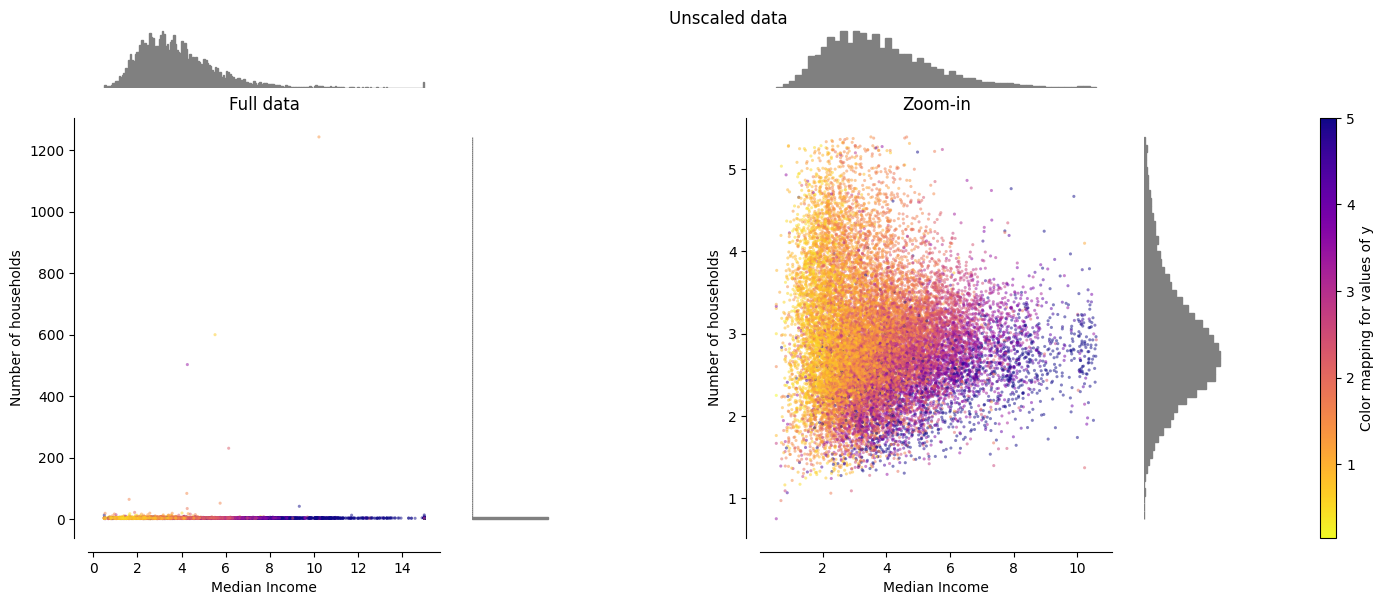

In [7]:
make_plot(0)

StandardScaler
--------------

``StandardScaler`` убирает среднее значение и масштабы для данных с единичной
дисперсией. Однако, выбросы влияют на вычисление эмпирического среднего и 
стандартного отклонения, что сужает диапазон значений признаков, как 
указывает изображение ниже. Заметьте, что в конкретном случае это так, потому
что выбросы для каждого признака имеют различные значимости, распределение 
преобразованных данных по каждому признаку очень различно: большинство данных 
лежат в промежутке [-2, 4] для преобразованной медианы дохода, в то время как 
те же данные втиснуты в меньший промежуток [-0.2, 0.2] для преобразованного 
количества проживающих семей.


Поэтому ``StandardScaler`` не может гарантировать уравновешенность масштабов 
признаков при наличии выбросов.



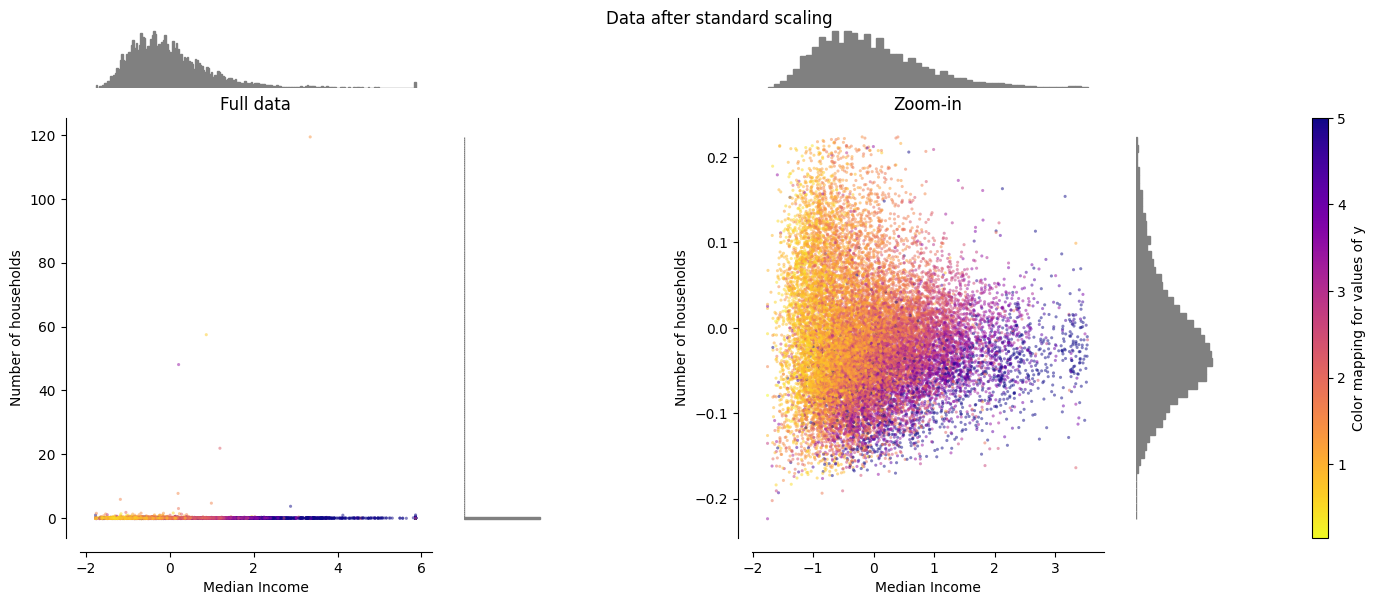

In [8]:
make_plot(1)

MinMaxScaler
------------

``MinMaxScaler`` изменяет масштаб датасета так, что все значения признаков
находятся в промежутке [0, 1], как показано ниже, в панели справа. Однако 
это масштабирование сжимает все не-выбросы в узкий промежуток [0, 0.005]
для преобразованного количества проживающих семей.

Как и ``StandardScaler``, ``MinMaxScaler`` очень чувствителен к наличию выбросов.



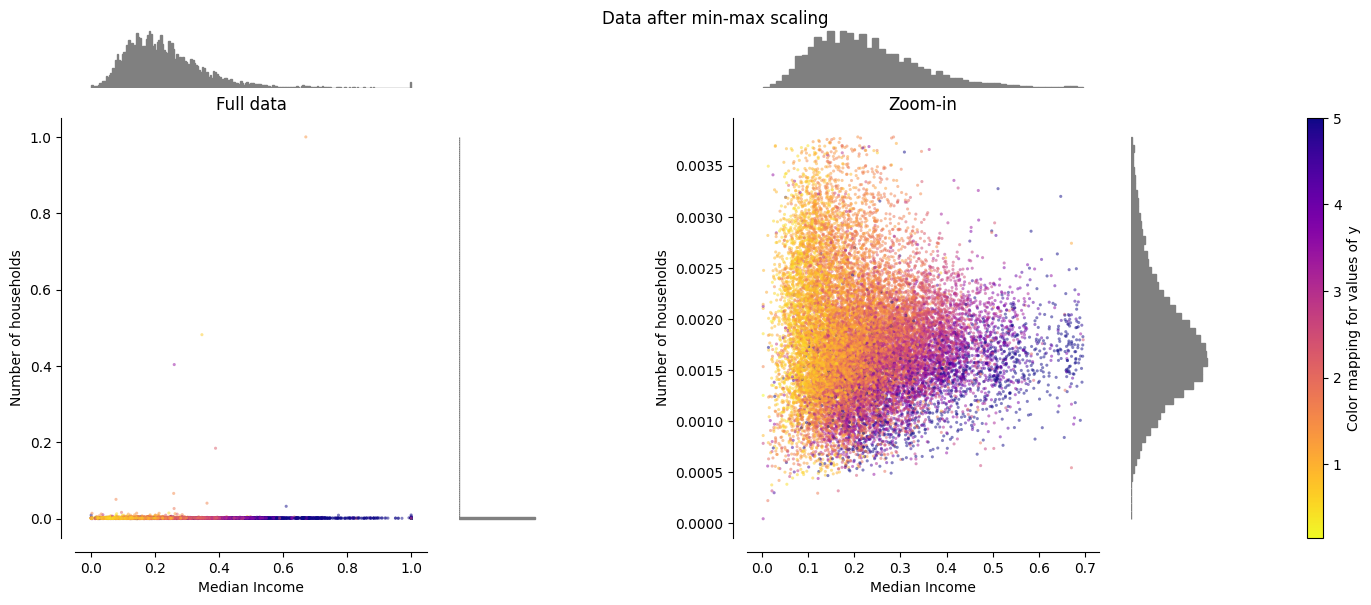

In [9]:
make_plot(2)

MaxAbsScaler
------------

``MaxAbsScaler`` отличается от предыдущих преобразователей масштаба тем, 
что его абсолютные значения расположены в промежутке [0, 1]. При только
положительных данных, данный преобразователь ведет себя так же, как и 
``MinMaxScaler``, поэтому он также страдает от наличия больших выбросов.



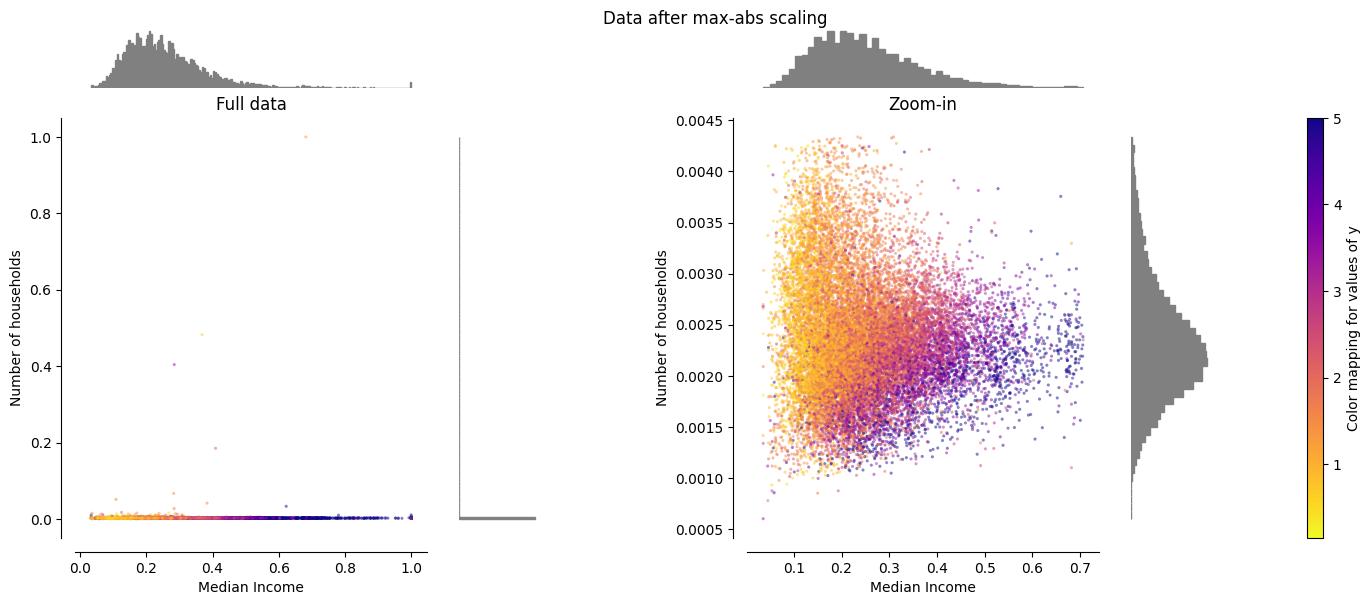

In [10]:
make_plot(3)

RobustScaler
------------

В отличие от предыдущих преобразователей масштаба, центрирование и 
масштабирование этого преобразователя основано на перцентилях и поэтому
не подвержено влиянию небольшого количества больших предельных выбросов.
Следовательно, результирующий диапазон значений преобразованных признаков 
больше, чем в предыдущих преобразователях и, что более важно, значения 
приблизительно равны: для обоих признаков большая часть преобразованных 
значений лежит в промежутке [-2, 3], как показано на увеличенном рисунке.
Заметьте, что выбросы сами по себе все еще существуют в преобразованных 
данных. Если отдельный выброс желаемо сохранить, то необходимо нелинейное
преобразование (см. ниже).


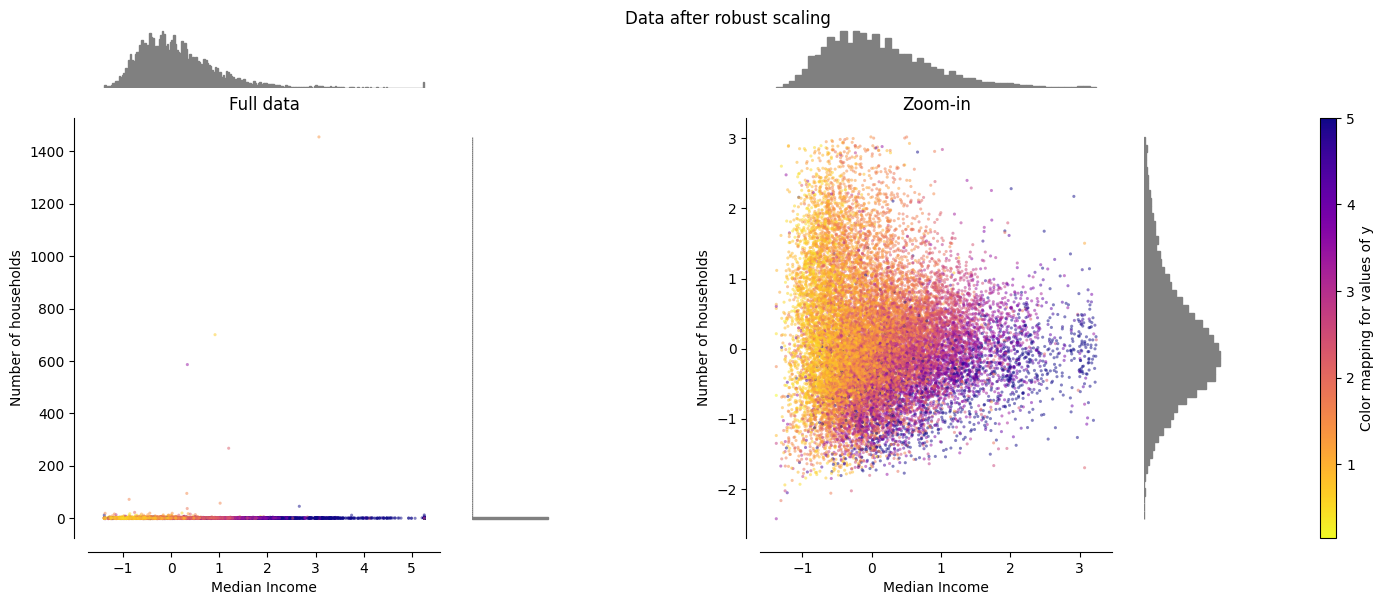

In [11]:
make_plot(4)

QuantileTransformer (равномерный вывод)
------------------------------------

``QuantileTransformer`` производит нелинейное преобразование, такое, что 
плотность вероятности функции каждого признака будет соответствовать 
равномерному распределению. В этом случае, все данные будут входить
в промежуток [0, 1], даже выбросы, которые больше нельзя разграничить с
не-выбросами.

Как и ``RobustScaler``, ``QuantileTransformer`` устойчив к выбросам:
при добавлении или удалении выбросов из обучающей выборки, даст
примерно такое же преобразование для данных. В отичие от ``RobustScaler``, 
``QuantileTransformer`` также автоматически коллапсирует любой выброс, 
устанавливая их в предварительно определенные рамки (0 и 1).



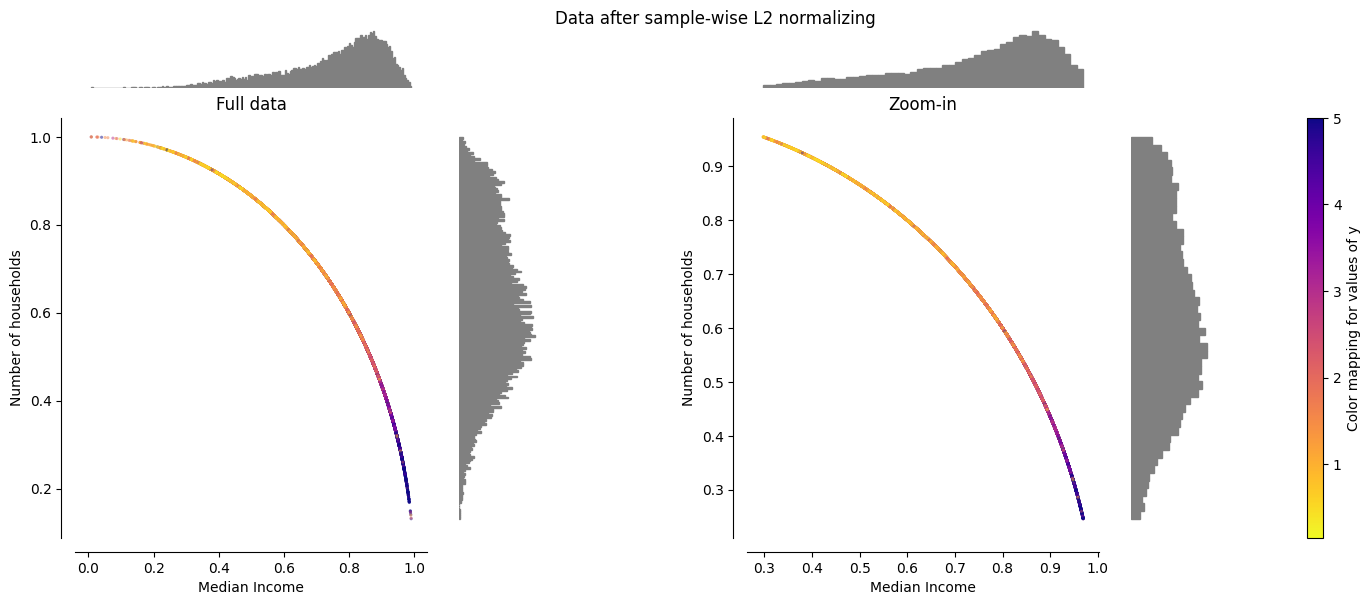

In [12]:
make_plot(5)

QuantileTransformer (вывод Гауссиана)
-------------------------------------

``QuantileTransformer`` имеет дополнительный параметр ``output_distribution``,
позволяющий подбирать распределение Гаусса вместо равномерного распределения.
Заметьте, что это беспараметрический преобразователь, который вводит насыщенность 
продуктами для крайних значений.




In [13]:
make_plot(6)

IndexError: list index out of range

Normalizer
----------

``Normalizer`` изменяет масштаб вектора для каждого примера, чтобы получить
единичную норму, независимо от распределения образцов.  Его видно на обоих
рисунка ниже, где все образцы сгруппированы в единичный круг. В нашем 
примере есть два выбранных признака только с положительными значеними; 
поэтому, преобразованные данные лежат лишь в положительном квадранте. Этого
бы не произошло, если бы некоторые искомые признаки имели смесь положительных
и отрицательных значений.




In [ ]:
make_plot(7)
plt.show()